# Projeto 3

Dados Happiness Alcohol Consumption

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

In [3]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [17]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [21]:
quant = dados[["HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

In [71]:
#quant.describe()

# HappinessScore

In [74]:
Y = dados["HappinessScore"]
X = dados[["HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.55
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           7.05e-27
Time:                        07:13:49   Log-Likelihood:                -120.66
No. Observations:                 122   AIC:                             253.3
Df Residuals:                     116   BIC:                             270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4899      0.461      1.063      0.290      -0.423       1.403
HDI                  0.0069      0.001     10.196      0.000       0.006       0.008
GDP_PerCapita        0.0002      0.000      0.672      0.503      -0.000       0.001
Beer_PerCapita       0.0007      0.001      0.912      0.363      -0.001       0.002
Spirit_PerCapita    -0.0014      0.001     -1.655      0.101      -0.003       0.000
Wine_PerCapita      -0.0014      0.001     -1.471      0.144      -0.003       0.000
==============================================================================
Omnibus:                        5.197   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.098
Skew:                          -0.185   Prob(JB):                        0.212
Kurtosis:                       2.312   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X3 = dados[['GDP_PerCapita',
       'Beer_PerCapita']]
results3 = regress(X3, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     28.94
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.75e-11
Time:                        07:12:33   Log-Likelihood:                -165.35
No. Observations:                 122   AIC:                             336.7
Df Residuals:                     119   BIC:                             345.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.1110      0.166     30.765      0.000       4.782       5.440
GDP_PerCapita     -0.0017      0.000     -3.849      0.000      -0.003      -0.001
Beer_PerCapita     0.0041      0.001      4.672      0.000       0.002       0.006
==============================================================================
Omnibus:                        1.163   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.231
Skew:                          -0.170   Prob(JB):                        0.540
Kurtosis:                       2.643   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
c = results3.params["const"]
w = results3.params["GDP_PerCapita"]
y = results3.params["Beer_PerCapita"]

In [29]:
def f(GDP, Beer):
    return c+w*GDP + y*Beer

In [30]:
npoints = 100
GDP = np.linspace(X3["GDP_PerCapita"].min(), X3["GDP_PerCapita"].max(), npoints)
Beer = np.linspace(X3["Beer_PerCapita"].min(), X3["Beer_PerCapita"].max(), npoints)

In [31]:
GDP_xx, Beer_yy = np.meshgrid(GDP, Beer)

In [32]:
z = f(GDP_xx, Beer_yy)

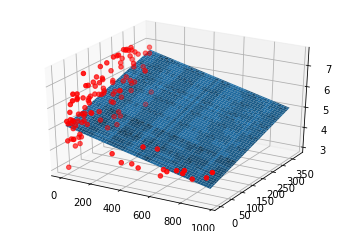

In [34]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(GDP_xx, Beer_yy, z)
plt3d.scatter(X3["GDP_PerCapita"],X3["Beer_PerCapita"], Y , color="r");

# HDI

In [60]:
Y1 = dados["HDI"]
X1 = dados[["HappinessScore", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

results = regress(X1,Y1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           1.22e-40
Time:                        18:06:18   Log-Likelihood:                -681.30
No. Observations:                 122   AIC:                             1375.
Df Residuals:                     116   BIC:                             1391.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              309.2889     35.785      8.643      0.000     238.413     380.165
HappinessScore      68.0812      6.677     10.196      0.000      54.856      81.307
GDP_PerCapita       -0.1579      0.033     -4.783      0.000      -0.223      -0.093
Beer_PerCapita       0.0942      0.074      1.274      0.205      -0.052       0.241
Spirit_PerCapita     0.2674      0.080      3.323      0.001       0.108       0.427
Wine_PerCapita       0.4671      0.081      5.749      0.000       0.306       0.628
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.219
Skew:                           0.027   Prob(JB):                        0.896
Kurtosis:                       2.800   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
Y1 = dados["HDI"]
X1 = dados[["HappinessScore", "Spirit_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

results = regress(X1,Y1)
results.summary()

X3_ = dados[['Spirit_PerCapita',
       'Beer_PerCapita']]
results3 = regress(X3_, Y1)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     36.94
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           3.31e-13
Time:                        07:15:56   Log-Likelihood:                -754.32
No. Observations:                 122   AIC:                             1515.
Df Residuals:                     119   BIC:                             1523.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              603.3078     19.574     30.821      0.000     564.549     642.067
Spirit_PerCapita     0.3794      0.142      2.666      0.009       0.098       0.661
Beer_PerCapita       0.7336      0.111      6.636      0.000       0.515       0.953
==============================================================================
Omnibus:                        2.924   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.900
Skew:                          -0.050   Prob(JB):                        0.387
Kurtosis:                       2.397   Cond. No.                         367.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
c = results3.params["const"]
w = results3.params["Spirit_PerCapita"]
y1 = results3.params["Beer_PerCapita"]

In [77]:
def f(Spirit, Beer):
    return c+w*Spirit + y1*Beer

In [80]:
npoints = 100
Spirit = np.linspace(X3_["Spirit_PerCapita"].min(), X3_["Spirit_PerCapita"].max(), npoints)
Beer = np.linspace(X3_["Beer_PerCapita"].min(), X3_["Beer_PerCapita"].max(), npoints)

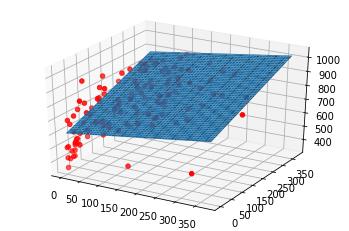

In [81]:
Spirit_xx, Beer_yy = np.meshgrid(Spirit, Beer)

z = f(Spirit_xx, Beer_yy)

plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(Spirit_xx, Beer_yy, z)
plt3d.scatter(X3_["Spirit_PerCapita"],X3_["Beer_PerCapita"], Y1 , color="r");